# **Workshop $\ket{10}$: Quantum Measurement**
$$\renewcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

---

## **Introduction**

Given the state of a qubit:

$$\ket{\psi} = c_0\ket{0} + c_1\ket{1},$$

or in matrix representation:

$$\ket{\psi} = \begin{bmatrix}
c_0 \\
c_1
\end{bmatrix}$$

The measurement in *computational basis* gives

outcome 0 with probability
$$
p(0) = |c_0|^2,
$$
and outcome 1 with probability
$$
p(1) = |c_1|^2.
$$
(Remember that $c_0$ and $c_1$ can be complex number!)

However, after the measurement the state is altered. What does it mean? It means that the states *collapse* to which you observed. If you do measurment again, you'll always observe the same outcome (as long as your qubit is not disturbed by anything else). The superposition is essentially **destroyed** after the measurement

The qubit's state after measurment outcome is 0 is
$$
\ket{\psi} = \ket{0}
$$ 

The qubit's state after measurment outcome is 1 is
$$
\ket{\psi} = \ket{1}
$$ 

### Multiple Qubits
Multiple systems can be view collectively as **single, compound system**. Quantum states of multiple systems are therefore represented by superposition of states of sequantial multiple ...
This means:

- 1 qubit: 2-dimensional state space  
- 2 qubits: \(2 \times 2 = 4\)-dimensional state space  
- 3 qubits: \(2^3 = 8\)-dimensional state space  
- and so on.

A multi‑qubit state is written using the **tensor product**, e.g.

$$
\ket{\psi} = \sum_{a,b = (0,1)}c_{ab}\ket{ab}
$$

As we can guess, if both X and Y are measured, then each possible outcome (a,b) appears with probablity
$$|\braket{ab}{\psi}|^2 = |c_{ab}|^2$$
and the system will be collapse to simply $\ket{ab}$, meaning that if you measured it again (on computational basis) you'll always get the same outcome as the measurment done earlier.

However, when we measure some of qubits inside a *multi‑qubit* system:

1. Only those qubits collapses.
2. The rest of the system collapses **conditionally**, based on the outcome.

This is extremely important in quantum computing, since circuits often measure only a subset of qubits.

For example, consider the state of two qubits (X,Y):
$$
\ket{\psi} = \frac{1}{\sqrt{2}}\ket{00} - \frac{1}{\sqrt{6}}\ket{00} + \frac{i}{\sqrt{6}}\ket{11} - \frac{i}{\sqrt{6}}\ket{11}
$$

To understand what happen after the first qubit X is measured, we rewrite the state in a form grouped by the first qubit:
$$
\ket{\psi} = 
\ket{0} \otimes \left(\frac{1}{\sqrt{2}}\ket{0} - \frac{1}{\sqrt{6}}\ket{1}\right) + 
\ket{1} \otimes \left(\frac{i}{\sqrt{6}}\ket{0} - \frac{i}{\sqrt{6}}\ket{1}\right)
$$

If measurement gives X=0, the state collapses to a normalized version of
$$
\ket{0} \otimes \left(\frac{1}{\sqrt{2}}\ket{0} - \frac{1}{\sqrt{6}}\ket{1}\right) \Longrightarrow \ket{0} \otimes \left(\frac{\sqrt{3}}{2}\ket{0} - \frac{1}{2}\ket{1}\right)
$$
If measurement gives X=0, the state collapses to a normalized version of
$$
\ket{1} \otimes \left(\frac{i}{\sqrt{6}}\ket{0} - \frac{i}{\sqrt{6}}\ket{1}\right) \Longrightarrow \ket{1} \otimes \left(\frac{1}{\sqrt{2}}\ket{0} - \frac{1}{\sqrt{2}}\ket{1}\right)
$$
The mechanism where measurment on one qubit affect another qubit is called **quantum entanglement**.

### Projective Measurement

In real life, what we can measure are real value (we don't live in imaginary world, right?), rather than the state itself. Such measurement is called **projective measurement**, and is described by an *obervable* (a Hermitian operator, for example, position and momentum). A The reason for this nomenclature is that we can only *observe* real values, and those real values have to be eigenvalues of Hermitian operator 

Furthermore, a projective measuremtn follow postulates:

1. The only possible results of the measurement of a Hermitian operator is one of the eigenvalues of the Hermitian operator. If $m$ is one of the eigenvalues of $M$, then the probablity of getting result $m$ is 
$$
 p(m) = \sum_i |\braket{m_i}{\psi}|^2
$$,

where $\{\ket{m_i}\}$ are set of eigenstates with eigenvalue $m$


2. Given that outcome $m$ occured, the state of the quantum system immeidately colllapse after the measurement to
$$
\ket{\psi'} = \frac{\sum_i \braket{m_i}{\psi}\ket{m_i}}{\sqrt{p(m)}}
$$

The denominator $\sqrt{p(m)}$ is to ensure that the state stay normalized.

We can also use the Projector operator:

$$
P_m = \sum_i \ket{m_i}\bra{m_i}.
$$

You can think of a projector as an operator that filters out all components of the state that do not correspond to the measurement outcome.
Using projectors, the measurement postulates can be written in a compact form:

$$
 p(m) = \sum_i \bra{\psi}P_m\ket{\psi}, \quad\ket{\psi'} = \frac{P_m{\psi}}{\sqrt{\bra{\psi}P_m\ket{\psi}}}
$$

---

## **Objective**
By the end of this workshop, you will be able to:

- find probability of possible outcomes from given states and measurments
- determine the state after measurment on different bases
- explain why there is inherent uncertainty of two non-commuting measurement
- explain the quantum measurement by using Stern-Gerlach experiment as an example
- use pennylane to create basic quantum circuit and perform measurement
  
---

## **Requirements**
python modules required:
- numpy
- matplotlib
- pennylane

In [ ]:
!pip install pennylane

In [1]:
import pennylane as qml
from pennylane.operation import Operation
from pennylane import numpy as np
import matplotlib.pyplot as plt

## Part 0: **Very Basic Introduction to pennylane**

PennyLane is a Python framework for building quantum circuits, simulating them, and connecting them to machine-learning tools.

Before moving on to later parts, you only need to remember a few essential functions and keywords. You do not need to understand the internals yet — you can come back here for reference anytime.

---

### Initializing and Visualizing a Circuit

```python
dev = qml.device("default.qubit", wires=2, shots=1000)

@qml.qnode(dev)
def demo(*args):
    qml.H(0); qml.CNOT([0,1])
    m = qml.measure(0)
    qml.RX(0.8, 1, conditional=m)
    return qml.expval(qml.Z(0)), qml.sample(1)
```

wires: number/labels of qubits
shots: number of repeated executions (if None, the circuit becomes analytic mode)

To visualize your circuit:

```python
print(qml.draw(demo)(*args))
```
or
```python
qml.draw_mpl(demo)(*args)
```

### Applying Gates
Simply put the name of operation with arguments include parameter of the operation (if avaiable) and index(s) of qubit(s) upon which you want to put the operation  

Here are a few examples:

```python
qml.X(0) # X (NOT) operation on qubit 0
qml.RX(np.pi/2, 1) # rotate qubit 1 around the x-axis by 90 degrees
qml.CNOT([0,1]) # CNOT is 2-qubit operation, so target qubits are written in list or tuple
```

### Measurements

- `qml.measure(wires,)` Perform a mid-circuit measurement (returns 0 or 1). Used for classical control inside a circuit.
- `qml.sample(observable)` Returns a list of measurement outcomes for each shot.
  - If observable=None or you use qml.sample(wires=...), PennyLane measures in the computational Z basis.
  - Otherwise, the measurement result in eigenvalue of the observable 
- `qml.expval(observable)` calculate expectation value of measurement
- **keyword** `postselect`: select only outcomes matching a desired bit value:

---

## **Part 1 Basic Quantum Measurement & Empirical Expectation Values**

In this part of the workshop, you will learn how measurements work in quantum computing, how sampling gives rise to probability distributions, and how gate operations affect measurement outcomes.  
All tasks use **PennyLane**, but the concepts work for any quantum simulator.

---

### Task 1.1 — Sampling Measurements

We will begin with the quantum state

$$
\frac{1}{\sqrt{2}} \big( |0\rangle + |1\rangle \big),
$$

which ideally gives 50% chance of measuring 0 and 50% chance of measuring 1.

1. **Compute the probablity** of measuring this state in the computational basis.  

2. **Increase the number of shots**:  
   - How does the histogram change as shot count increases?
   - What trend do you observe between sampling noise and number of samples?

3. **Change the initial state** to something else and compare:
   - probability distribution predicted analytically  
   - probability distribution from sampling  
   - expectation values




================================================ TASK 1.1 ================================================


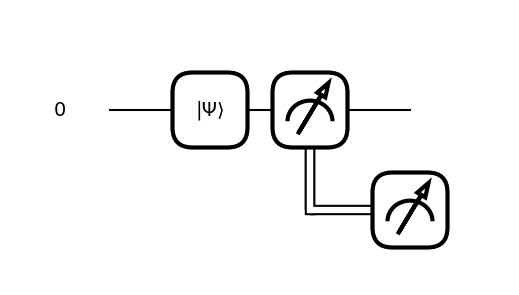

In [3]:

# TASK 1.1
print("================================================ TASK 1.1 ================================================")

shots = 1000 # number of sampling (increase here)
dev = qml.device("default.qubit", shots=shots)

@qml.qnode(dev)
def measure_simple():
    qml.StatePrep([np.sqrt(0.5),np.sqrt(0.5)], wires=0) # prepare state (|0> + |1>)/√2 (change initial state here)
    return qml.sample(qml.measure(0))

qml.draw_mpl(measure_simple)()

samples = measure_simple() # list
# print(samples)
# put your code here to calculate probablity of outcome 0 and 1

### Task 1.2 — Measurement After a Quantum Gate

Starting from the initial state

$$
\ket{\psi} = \ket{0},
$$

apply each of the following gates **separately**, measure the state, compute the expectation value, and compare to your theoretical calculation:

- X gate
- Hadamard gate
- Rotation around the y‑axis by 90°

================================================ TASK 1.2 ================================================


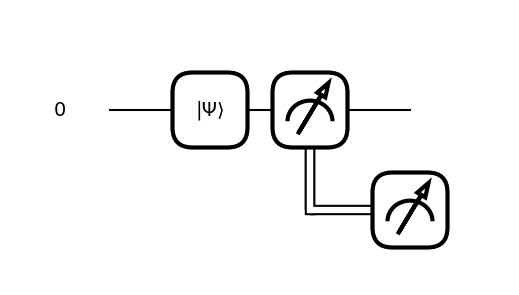

In [ ]:
# TASK 1.2
print("================================================ TASK 1.2 ================================================")

dev = qml.device("default.qubit", shots=2000)

@qml.qnode(dev)
def measure_after_gate():
    qml.AmplitudeEmbedding([1,0], wires=0) # prepare state |0>
    
    #qml.PauliX(0)
    #qml.Hadamard(0)
    #qml.RY(np.pi/2, 0)
    return qml.sample(qml.measure(0))

qml.draw_mpl(measure_after_gate)()
samples = measure_after_gate()
#print(samples)

samples = measure_simple() 
# put your code here to calculate probablity



### Task 1.3 — Multiple Qubits

Computation with a single qubit doesn't seem to be much useful, so now we'll extend to two qubits.

Find the probability of the outcome of following circuit:

1. **CNOT gate**\
    CNOT operation is defined by:
    $$\rm{CNOT} = 
    \begin{pmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0
    \end{pmatrix}.
    $$
    Where the first qubit is "control qubit" and the second is "target qubit". If the control qubit is $\ket{1}$, the target qubit's state is flipped (it undergoes X operation). If the control qubit is $\ket{0}$, the target qubit stays the same.
   - Prepare input states $\ket{10}$.  
   - Predict outcomes after CNOT.  
   - Sample and compare to analytical probability

2. **Bell‑state preparation**  
    Bell state is They represent **maximally entangled** two‑qubit states—states where the qubits
    are so strongly correlated that measuring one instantly determines the state
    of the other, no matter how far apart they are.

    These states cannot be written as a simple tensor product of two single‑qubit
    states. Instead, their information is shared *non‑locally* across the pair.

    One of the bell states for 2 qubit we're interested in this task is:
    $$\ket{\Psi_+} = \frac{1}{\sqrt{2}}(\ket{00} + \ket{11})$$

    In this part, you will learn how to prepare bell-state and how measurement on one of qubits readily reveal information of the another.

    Please do the following:

   - Prepare input states $\ket{00}$.  
   - apply Hadamard on qubit 0  
   - apply CNOT gate (qubit 0 is control qubit and qubit 1 is target qubit)
   - What correlations do you observe?
   - Do the outcomes always match? (00 or 11)

3. **Customized multiple gates**  
    - Given the sequences of operation in code below, calculate the final state and determine the probability of measurement outcomes
    - Compare with sampling results
    - (optional) add/adjust gates and do the same


================================================ TASK 1.3 ================================================


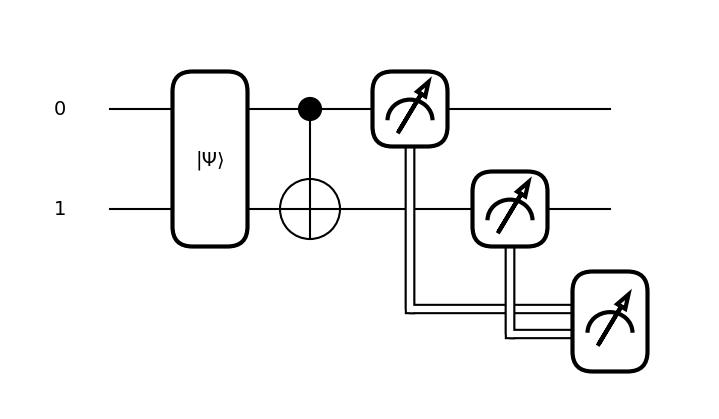

In [5]:
# TASK 1.3
print("================================================ TASK 1.3 ================================================")

dev = qml.device('default.qubit', wires=2, shots=2000)

@qml.qnode(dev)
def measure_CNOT():
    qml.StatePrep([0,0,1,0], wires=(0,1)) # state |10>
    qml.CNOT(wires=[0, 1])
    m0 = qml.measure(0)
    m1 = qml.measure(1)
    return qml.sample(m0), qml.sample(m1)

@qml.qnode(dev)
def measure_bellState():
    qml.StatePrep([1,0,0,0], wires=(0,1)) # state |00>
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    m0 = qml.measure(0)
    m1 = qml.measure(1)
    return qml.sample(m0), qml.sample(m1)

@qml.qnode(dev)
def measure_multipleGates():
    qml.StatePrep([0,0,1,0], wires=(0,1)) # state |1,0>
    qml.RY(np.pi/3, wires=0)
    qml.CNOT(wires=[0, 1])
    m0 = qml.measure(0)
    m1 = qml.measure(1)
    return qml.sample(m0), qml.sample(m1)

qml.draw_mpl(measure_CNOT)()
# qml.draw_mpl(measure_bellState)()
# qml.draw_mpl(measure_multipleGates)()
q1, q2 = measure_CNOT()
# q1, q2 = measure_bellState()
# q1, q2 = measure_multipleGates()

# put your code here to find probability of measurment outcomes

## Part 2 — State After Measurement and Repeated Measurements

Now we look at **state collapse** and what happens if you measure the **same observable twice**.


and the **post-measurement state**, given that outcome 0 occurs, is
$$
\ket{\psi} \rightarrow \ket{\psi'} = \ket{0}
$$

and similarly for outcome 1

---

### Task 2.1 — Single Qubit

The below code given is circuit of repeated measurement after measurement done in task 1.1

- The qubit is initialzed as
  $$\ket{\psi} = \frac{1}{2}(\ket{0} + \ket{1})$$
- It is measured twice using `qml.measure()` (the code has already been implemented for you)
- determine and answer the following:
  - What is the sequence (trajectory) of measurement outcomes across many trials? (Plot a bar chart of counts of pairs like `00`, `01`, `10`, `11`.)
  - Is there any situation where the second measurment outcome is different from the first one, and why?
  - Try to change the initial state for the qubit, do the probablities of first and second measurement change?


================================================ TASK 2.1 ================================================


/home/topraramx/.local/lib/python3.12/site-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


(<Figure size 700x300 with 1 Axes>, <Axes: >)

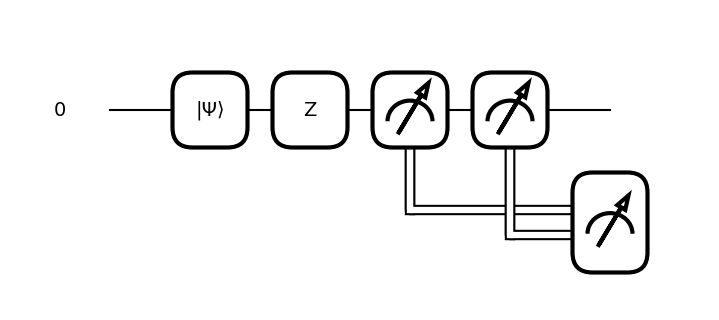

In [125]:
# TASK 2.1
print("================================================ TASK 2.1 ================================================")

dev = qml.device("default.qubit", wires=1, shots=1000)

@qml.qnode(dev)
def repeated_measurement():
    qml.StatePrep([np.sqrt(0.6), np.sqrt(0.6)], wires=0)
    qml.PauliZ(0)
    psi1 = qml.measure(0)
    psi2 = qml.measure(0)
    return qml.sample(psi1), qml.sample(psi2)

display(qml.draw_mpl(repeated_measurement)())

# put your code here for task 2.1



### Task 2.2 - Multiple Qubits

In this task, you'll review how measurement in one qubit affects the state of another qubit, especially when qubits are **entangled**.\
To see this, follow the steps:

1. initialized system of 2 qubits as 
  $$\ket{\psi} = \frac{1}{\sqrt{2}}\ket{00} - \frac{1}{\sqrt{6}}\ket{00} + \frac{i}{\sqrt{4}}\ket{11} - \frac{i}{\sqrt{12}}\ket{11}$$
2. qubit 0 is measured and assumed outcome 0 is observed (use `postselect = 0` in `qml.measure()`)
3. Compute the **probabilities** that qubit 1 is in state $\ket{0}$ or $\ket{1}$.
4. assuming the qubit 0 is measured as $\ket{1}$, compute the probabilities of qubit 1 being $\ket{0}$ or $\ket{1}$\
(Hint: change value of `postselect` to 1)
5. Repeat the procedure, with qubit 1 being first measured (find the state of the system and probability of second measuremnt on qubit 0)

#### Questions
- Are result from steps 3 and 4 identical? What is the state of the system right before second for each case?
- looking back to bell state in task 1.3, try to answer why measurement of the first qubit readily reveals the state of another one?.\
  (Hint: what is the state of the system after the first qubit is measured?)


================================================ TASK 2.2 ================================================


/home/topraramx/.local/lib/python3.12/site-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


(<Figure size 500x300 with 1 Axes>, <Axes: >)

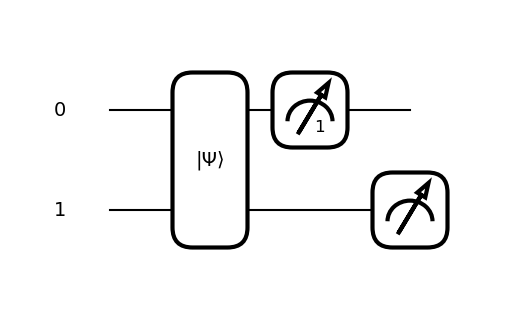

In [127]:
# TASK 2.2
print("================================================ TASK 2.2 ================================================")

dev = qml.device("default.qubit", wires=2, shots=2000)

@qml.qnode(dev)
def repeated_measurement_multipleQubits():
    qml.StatePrep([1/np.sqrt(2), -1/np.sqrt(6), 1j/np.sqrt(6), -1j/np.sqrt(6)], wires=(0,1))
    qml.measure(0, postselect=1) # measurement of the first qubit has been done (you can change postselect value and the qubit being measured)
    return qml.probs(1) # subsequent measurment on another qubit

display(qml.draw_mpl(repeated_measurement_multipleQubits)())
p2 = repeated_measurement_multipleQubits()

# put your code here

## **Part 3: Projective Measurment - Stern-Gerlach Experiment**

So far we only measured in the Z basis. Now in Stern-Gerlach experiment, we can also have measure spin in different orientations (X, Y). As a matter of fact, in physical system we can measure many physical properties we wish to (for example, position and energy).

Those measurement are **projective measurement** and are described by *observables* (please refer to introdcution)

$$
\sigma_x = \begin{pmatrix}0 & 1 \\[4pt] 1 & 0\end{pmatrix},\qquad
\sigma_y = \begin{pmatrix}0 & -i \\[4pt] i & 0\end{pmatrix},\qquad
\sigma_z = \begin{pmatrix}1 & 0 \\[4pt] 0 & -1\end{pmatrix}.
$$

Each has eigenvalues \(+1\) and \(-1\). Their eigenstates are:

- Z‑basis (computational):
  $$
  \ket{0}=\begin{bmatrix}1\\0\end{bmatrix},\qquad
  \ket{1}=\begin{bmatrix}0\\1\end{bmatrix},
  $$
  with
  $\sigma_z\ket{0}=+1\ket{0},\ \sigma_z\ket{1}=-1\ket{1}.$

- X‑basis:
  $$
  \ket{+}=\frac{1}{\sqrt{2}}(\ket{0}+\ket{1}),\qquad
  \ket{-}=\frac{1}{\sqrt{2}}(\ket{0}-\ket{1}),
  $$
  with $\sigma_x\ket{\pm}=\pm1\ket{\pm}.$

- Y‑basis:
  $$
  \ket{y+}=\frac{1}{\sqrt{2}}(\ket{0}+i\ket{1}),\qquad
  \ket{y-}=\frac{1}{\sqrt{2}}(\ket{0}-i\ket{1}),
  $$
  with $\sigma_y\ket{y\pm}=\pm1\ket{y\pm}.$

and after the measurement, the state will **collpase** to the eigenstate corresponding to eigenvalue being measured (in case you still are not sure about this, go back to introduction to better understanding).

### Physical Setup

To get a better idea of the experiment, now let's look at the experiment apparatus:

<div style="text-align: center;">
  <img src="https://quantum.cloud.ibm.com/assets-docs-learning/_next/image?url=%2Flearning%2Fimages%2Fmodules%2Fquantum-mechanics%2Fstern-gerlach-measurements-with-qiskit%2Fsg-device.avif&w=3840&q=75" width="600" alt="Stern-Gerlach Experiment">
  <p><em>Figure: Stern-Gerlach Experiment Setup (Image credit: IBM Qiskit)</em></p>
</div>

The figure above shows Stern-Gerlach experiment setup. Where silver atoms travels through an inhomogeneous magnetic field, and being deflected up or down depending on their spin. According to the figure, inhomogeneous magnetic field is only in z-direction (we call this set up **SG-Z** apparatus), so the spin being *measured* is in respect to z-axis and described by Pauli-Z matrix:

$$
\sigma_Z =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

(if you are not convinced by this, just believe for now that the spin is represented by pauli matrix). You can do the same for inhomogeneous magnetic field in x-direction, y-direction, or even any arbitary direction (in this case the observable associated with measurement can look a bit complicated)

However, measuring in new orinetaion will destroy information we knew about previous measurment, which will be demonstrated in this task.

---

### Task 3.1 — Basic Projective Measurement

Implement the circuit similar to task 1.1 with some adjustments:
  - replace `qml.measure()` with `qml.pauliZ()` so the `qml.sample()` returns +1 or -1, which are eigenvalues of Pauli-Z matrix and can be observed in physical system.
  - calculate the probabilty of each outcome. Is the probablity distribution the same to that in task 1.1?\
  - (optional) change `qml.sample()` to `qml.expval()` to find expected value of the measurment outcome

**Hint:** $\ket{0}$ and $\ket{1}$ are **eigenstates** of Pauli-Z matrix

In [ ]:
# TASK 3.1

# put your code here
# at this point, you should be able to write completely by yourself

### Task 3.2 — Sequantial Stern-Gerlach Experiments

We now study sequential Stern-Gerlach experiments. The word "sequential" means that the beam undergoes two or more apparatus in sequence (Each atom of a beam will deflects according to its spin on orientation of each apparatus)

- Staring from initial state $\frac{1}{2}(\ket{1} + \ket{2})$, implement 3 different circuit to represent sequential circuits (the codes have been already given):

1. measurement of $\sigma_Z$, followed by $\sigma_Z$ (similar to part 2)
2. measurement of $\sigma_Z$, followed by $\sigma_X$
3. measurement of $\sigma_Z$, followed by $\sigma_X$ and $\sigma_Z$

- Find the probability of the final outcome. For scenerio 3 in particular, what does collapse after measutment say in regarding to each situation?
- (optional) try to implement SG-Y replacing SG-X. To get the mid measurment associated with 

**Note:**
Observe that pauli matrices don't commute to each other. This cause inherent uncertainty of measurement: you cannot simultaneously observe 

1. measurement of $\sigma_Z$, followed by $\sigma_Z$ (similar to part 2)

/home/topraramx/.local/lib/python3.12/site-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

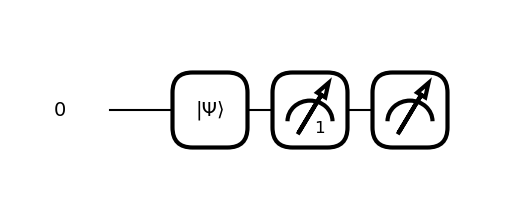

In [149]:
# TASK 3.2.1

shots = 1000 # number of sampling (increase here)
dev = qml.device("default.qubit", shots=shots)

@qml.qnode(dev)
def measure_simple():
    qml.StatePrep([np.sqrt(0.5),np.sqrt(0.5)], wires=0) # prepare state (|0> + |1>)/√2 (change initial state here)
    
    # First SG-Z
    qml.measure(0, postselect=0) # filter down-spin out
    
    # Second SG-X
    return qml.sample(qml.PauliZ(0))

qml.draw_mpl(measure_simple)()

samples = measure_simple() # list
print(samples)
# put your code here

2. measurement of $\sigma_Z$, followed by $\sigma_X$

/home/topraramx/.local/lib/python3.12/site-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


[-1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1.
 -1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.
 -1. -1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1.
 -1.  1.  1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.
 -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.
  1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.
 -1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1.  1.  1.
  1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1.
 -1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1.
  1. -1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.
  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1

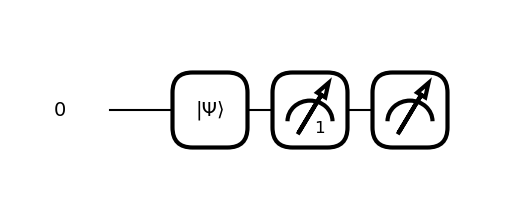

In [150]:
# TASK 3.2.2

shots = 1000 # number of sampling (increase here)
dev = qml.device("default.qubit", shots=shots)

@qml.qnode(dev)
def measure_simple():
    qml.StatePrep([np.sqrt(0.5),np.sqrt(0.5)], wires=0) # prepare state (|0> + |1>)/√2 (change initial state here)
    
    # SG-Z
    qml.measure(0, postselect=1) # filter down-spin out
    
    # SG-X
    return qml.sample(qml.PauliX(0))

qml.draw_mpl(measure_simple)()

samples = measure_simple() # list
print(samples)
# put your code here

/home/topraramx/.local/lib/python3.12/site-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


[ 1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1.
  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1.
  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.
  1. -1. -1.  1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.
  1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1.
  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.
 -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1.
 -1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.
  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1.  1.
  1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1.
  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1.
  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1.
  1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1

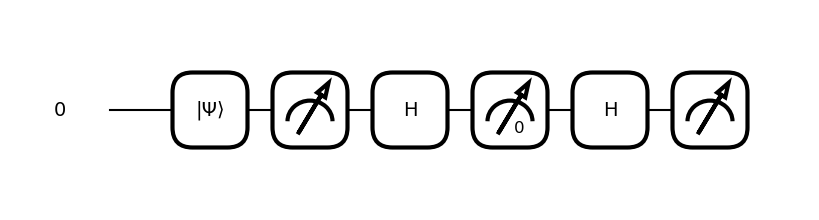

In [151]:
# TASK 3.2.3

shots = 1000 # number of sampling (increase here)
dev = qml.device("default.qubit", shots=shots)

@qml.qnode(dev)
def measure_simple():
    qml.StatePrep([np.sqrt(0.5),np.sqrt(0.5)], wires=0) # prepare state (|0> + |1>)/√2 (change initial state here)
    
    # First SG-Z 
    qml.measure(0) # filter down spin out
    
    # SG-X
    qml.Hadamard(0)
    qml.measure(0, postselect=0) # filte down spin (in x axis) out
    qml.Hadamard(0)
    
    # Second SG-X
    return qml.sample(qml.PauliZ(0))

qml.draw_mpl(measure_simple)()

samples = measure_simple() # list
print(samples)

### Task 3.3 — Significance of Relative Phase
Considering two states
$$
\ket{\psi_1} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}{1} \\ 
\ket{\psi_1} = \frac{1}{\sqrt{2}}\ket{0} + \frac{i}{\sqrt{2}}{1}
$$

It's tempting to think that, "oh the probablity of (on computational basis) measurement are just the same, why does the relative matter at all?"
Try to use projective measurment described by an observable other than $Z$. Ration the result be rewriting the states as superposition of eigenvectors of chosen observable

In [ ]:
# TASK 3.3

# put your code here
# let's try by yourself this time 